In [1]:
import pandas as pd

In [2]:
def preprocess(filename):
    """Preprocess NCDC weather data"""

    fields = ['STN', 'WBAN', 'YEARMODA', 'TEMP', 'TEMP_count', 'DEWP', 'DEWP_count', 'SLP', 'SLP_count', 'STP', 'STP_count', 'VISIB', 'VISIB_count', 'WDSP', 'WDSP_count', 'MXSPD', 'GUST', 'MAX', 'MIN', 'PRCP', 'SNDP', 'FRSHTT']
     
    df = pd.read_csv(filename, 
                  sep=r'\s+', 
                  names=fields, 
                  header=0, 
                  parse_dates=['YEARMODA'], 
                  na_values={'TEMP':[9999.9], 
                             'DEWP':[9999.9], 
                             'SLP':[9999.9], 
                             'STP':[9999.9], 
                             'VISIB':[999.9], 
                             'WDSP':[999.9], 
                             'MXSPD':[999.9], 
                             'GUST':[999.9], 
                             'MAX':['9999.9'], # doesn't matter whether float or str
                             'MIN':['9999.9'], 
                             'PRCP':['99.99'],
                             'SNDP':[999.9]}
                 )
    flagged = df.copy()
 
    def strip_flag(x):
        if type(x) is float:
            return x
        elif type(x) is str:
            return float(x[:-1]) if '*' in x else float(x)
    def extract_flag(x):
        if type(x) is float:
            return False
        elif type(x) is str:
            return True if '*' in x else False
     
    flagged['MAX'] = df['MAX'].map(strip_flag)
    flagged['MAX_flag'] = df['MAX'].map(extract_flag)
    flagged['MIN'] = df['MIN'].map(strip_flag)
    flagged['MIN_flag'] = df['MIN'].map(extract_flag)
     
    flagged['PRCP'] = df['PRCP'].map(lambda x: float(x[:-1]) if type(x) is str else x)
    PRCP_flag = df['PRCP'].map(lambda x: x[-1] if type(x) is str else x)
    PRCP_dummies = pd.get_dummies(PRCP_flag).add_prefix('PRCP_')
    preprocessed = flagged.join(PRCP_dummies)
    
    return preprocessed

In [3]:
dfs = []
dfs.append(preprocess('CA_1981-1985.txt'))
dfs.append(preprocess('CA_1985-1989.txt'))
dfs.append(preprocess('CA_1989-1993.txt'))
dfs.append(preprocess('CA_1993-1997.txt'))
dfs.append(preprocess('CA_1997-2001.txt'))
dfs.append(preprocess('CA_2001-2005.txt'))
dfs.append(preprocess('CA_2005-2009.txt'))
dfs.append(preprocess('CA_2009-2015.txt'))

In [4]:
df = pd.concat(dfs)
print df.shape

(1370304, 31)


In [5]:
df.head()
df = df.dropna(axis=0)

In [6]:
df[['STN','YEARMODA','TEMP','DEWP','VISIB','WDSP','GUST','MAX','MIN','PRCP']]

,STN,YEARMODA,TEMP,DEWP,VISIB,WDSP,GUST,MAX,MIN,PRCP
14239,722900,1983-11-20,63.9,55.7,9.2,7.9,22.9,72.9,60.1,0.22
14240,722900,1983-11-21,60.4,46.5,10.9,14.1,29.9,69.1,54.0,0.48
14390,722900,1984-04-19,63.9,53.8,11.4,11.5,24.1,68.0,60.1,0.11
98918,725910,1985-04-21,52.5,41.2,13.0,11.6,18.1,60.1,46.9,0.03
71115,724800,1987-12-16,30.1,17.0,13.3,15.0,33.0,33.1,23.0,0.01
75304,724800,1992-12-30,33.1,24.6,42.8,6.3,19.8,41.9,23.0,0.35
73152,724800,1994-03-25,38.0,32.4,8.3,6.9,23.9,54.9,32.0,0.08
49910,723815,1999-10-07,68.3,37.8,29.4,12.2,35.9,82.2,55.2,0.00
49931,723815,1999-10-28,71.9,42.1,24.9,13.4,35.0,85.5,60.8,0.00
55442,723830,1999-10-04,74.6,39.0,10.0,13.4,23.9,82.0,55.9,0.00


In [7]:
#df['DIFF'] = df['MAX'] - df['MIN']
df_subsetted = df[['STN','YEARMODA','PRCP', 'MXSPD', 'WDSP']]
df_subsetted.head()

,STN,YEARMODA,PRCP,MXSPD,WDSP
14239,722900,1983-11-20,0.22,15.9,7.9
14240,722900,1983-11-21,0.48,19.0,14.1
14390,722900,1984-04-19,0.11,17.1,11.5
98918,725910,1985-04-21,0.03,15.0,11.6
71115,724800,1987-12-16,0.01,24.1,15.0


In [8]:
df_subsetted.to_csv('CA_1981-2015_subsetted.csv')

In [9]:
df_subsetted = pd.read_csv('CA_1981-2015_subsetted.csv', parse_dates=['YEARMODA'])

##Seperate Novembers

In [10]:
df_monthly = df_subsetted.groupby('STN').apply(lambda x: x.set_index('YEARMODA')[['PRCP', 'MXSPD', 'WDSP']].resample('M'))
df_monthly = df_monthly.reset_index()

In [11]:
def extract_novembers(df):
    df_timed = df.set_index('YEARMODA')[['PRCP', 'MXSPD', 'WDSP']]
    return df_timed[df_timed.index.month == 11]

In [12]:
df_novembers = df_monthly.groupby('STN').apply(extract_novembers)
df_novembers = df_novembers.reset_index()
df_novembers.head()

,STN,YEARMODA,PRCP,MXSPD,WDSP
0,722900,1983-11-30,0.35,17.45,11
1,723810,2009-11-30,NaN,NaN,NaN
2,723810,2010-11-30,NaN,NaN,NaN
3,724800,1988-11-30,NaN,NaN,NaN
4,724800,1989-11-30,NaN,NaN,NaN


In [13]:
df_novembers.to_csv('CA_1981-2015_novembers.csv')

In [14]:
df_novembers = pd.read_csv('CA_1981-2015_novembers.csv', parse_dates=['YEARMODA'])
df_novembers = df_novembers[['STN', 'YEARMODA','PRCP', 'MXSPD', 'WDSP']]
df_novembers.head()

,STN,YEARMODA,PRCP,MXSPD,WDSP
0,722900,1983-11-30,0.35,17.45,11
1,723810,2009-11-30,NaN,NaN,NaN
2,723810,2010-11-30,NaN,NaN,NaN
3,724800,1988-11-30,NaN,NaN,NaN
4,724800,1989-11-30,NaN,NaN,NaN


In [15]:
dff = df_novembers.set_index('YEARMODA')['1990':'2015']
dff = dff.reset_index()

In [16]:
dff.head()

,YEARMODA,STN,PRCP,MXSPD,WDSP
0,2009-11-30,723810,NaN,NaN,NaN
1,2010-11-30,723810,NaN,NaN,NaN
2,1990-11-30,724800,NaN,NaN,NaN
3,1991-11-30,724800,NaN,NaN,NaN
4,1992-11-30,724800,NaN,NaN,NaN


In [17]:
all_data = dff.pivot_table(index=['YEARMODA'], columns=['STN']).dropna(axis=1)
all_data

YEARMODA
1990-11-30
1991-11-30
1992-11-30
1993-11-30
1994-11-30
1995-11-30
1996-11-30
1997-11-30
1998-11-30
1999-11-30


In [18]:
all_data

YEARMODA
1990-11-30
1991-11-30
1992-11-30
1993-11-30
1994-11-30
1995-11-30
1996-11-30
1997-11-30
1998-11-30
1999-11-30


In [19]:
all_data.to_csv('CA_notnull.csv')

In [20]:
all_data.shape


(23, 0)

In [21]:
all_data.columns

MultiIndex(levels=[[u'PRCP', u'MXSPD', u'WDSP'], [723810, 724800]],
           labels=[[], []],
           names=[None, u'STN'])

In [22]:
import numpy as np

mse = []
all_data = pd.read_csv('CA_notnull.csv', header=[0,1], index_col=0)
all_data.index = pd.to_datetime(all_data.index)

#el nino years
df_15 = all_data[all_data.index.year == 2015].values
df_97 = all_data[all_data.index.year == 1997].values

df_02 = all_data[all_data.index.year == 2002].values
df_09 = all_data[all_data.index.year == 2009].values

#non el nino
df_90 = all_data[all_data.index.year == 1990].values


val1 = np.sum((df_15 - df_97)**2)
mse.append(val1)
val2 = np.sum((df_15 - df_02)**2)
mse.append(val2)
val3 = np.sum((df_15 - df_09)**2)
mse.append(val3)
val4 = np.sum((df_15 - df_90)**2)
mse.append(val4)


IndexError: list index out of range

In [ ]:
print mse

In [ ]:
(np.array([1,3]) - np.array([1,4]))**2

In [ ]:
df_15.values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(all_data)
projected

In [ ]:
from plotly import plotly as ply
ply.sign_in('wgopar', 'y3jt1ddvvu')
from plotly import graph_objs as go

In [ ]:
# two dimensional projection
trace0 = go.Scatter(
    x=projected[:,0],
    y=projected[:,1],
    name='Projected',
    mode='markers+text',
    text=all_data.index.year,
)
layout = go.Layout(
    title="California transformed PCA"
)
figure = go.Figure(data=[trace0], layout=layout)
ply.iplot(figure, filename='WeatherData/sandiego_PCA')

In [378]:
ply.image.save_as(figure, 'California transformed PCA.png')

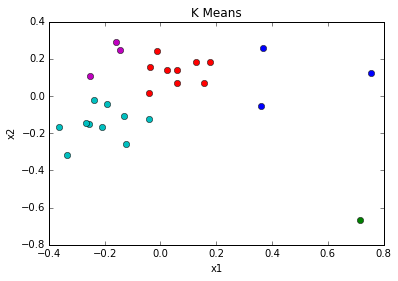

In [398]:
import scipy.cluster.vq as CL
import matplotlib.pyplot as pp
import numpy as np
%matplotlib inline


#number of centroids
numK = 5


centroids, sq = CL.kmeans(np.array(projected), numK)

#compute distance of each sample to the centroids
dist = [(np.sum((np.array(projected) - np.array([centroids[i]]))**2,1)) for i in range(numK)]

#assign sample to closest cluster
class_assigned = [(np.where(np.transpose(dist)[i]==min(np.transpose(dist)[i])))[0][0] for i in range(projected.shape[0])]
clustered = [[projected[i] for i, clu in enumerate(class_assigned) if clu == k*1.] for k in range(numK)]

# plotting each class
for k in range(numK):
    pp.plot(np.transpose(clustered[k])[0], np.transpose(clustered[k])[1],'o')

#### CHANGE THESE LABELS TO MATCH YOUR DATA
pp.title('K Means')
pp.xlabel('x1')
pp.ylabel('x2')
pp.show()

In [399]:
pca2 = PCA(n_components=3)
projected2 = pca2.fit_transform(all_data)

# 3 dimensional projection
trace1= go.Scatter3d(x=projected2[:,0],
                    y=projected2[:,1],
                    z=projected2[:,2],
                    mode='markers+text',
                    text=all_data.index.year
                    )
data = [trace1]
ply.iplot(data,filename='simple-3d-scatter')

In [ ]:
for i in range(N2015.shape[0])